In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
#from autoimpute.imputations import SingleImputer, MultipleImputer

# for ML Modelling
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn import tree
import statsmodels as sm



C:\Users\errit\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
###################  ROUTINE ####################### 

# Variables 
wd = "F:\Work Folder\Ritesh\ML\KAGGLE-CASESTUDY\KAGGLE-RISK-CS"
train_dataset = "application_train.csv"
# Set working directory
os.chdir(wd)

# Import Libraries
import FunctionLib as f

# Import working dataset
train_df = pd.read_csv(train_dataset)

# Summarize data infor from dataset    
#f.dataframeinfo(train_df)

# Seperate the target from working dataset
#target = train_df.TARGET
#x_df = train_df.drop(train_df[['TARGET']],axis=1)

# Create a new dataset same as train data
x_df = train_df.sample(frac=0.1, random_state=1).reset_index(drop=True)

In [3]:
# Delete the original dataset and work with Sample to free some space for processing.
del train_df

In [4]:
f.get_missing_value_feats(x_df)

Index(['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGA

In [5]:
# Seperate the categorical and numerical features
num_feats,cat_feats = f.distinct_feats(x_df)
print(len(num_feats),len(cat_feats))
num_feats.remove('TARGET')

106 16


In [6]:
f.change_type(x_df,num_feats,10)

Seems Numerical: SK_ID_CURR 30751
Seems categorical column: CNT_CHILDREN 7
CNT_CHILDREN changing type to Object
Seems Numerical: AMT_INCOME_TOTAL 579
Seems Numerical: AMT_CREDIT 2893
Seems Numerical: AMT_ANNUITY 7335
Seems Numerical: AMT_GOODS_PRICE 459
Seems Numerical: REGION_POPULATION_RELATIVE 81
Seems Numerical: DAYS_BIRTH 13782
Seems Numerical: DAYS_EMPLOYED 6880
Seems Numerical: DAYS_REGISTRATION 11297
Seems Numerical: DAYS_ID_PUBLISH 5556
Seems Numerical: OWN_CAR_AGE 51
Seems categorical column: FLAG_MOBIL 1
FLAG_MOBIL changing type to Object
Seems categorical column: FLAG_EMP_PHONE 2
FLAG_EMP_PHONE changing type to Object
Seems categorical column: FLAG_WORK_PHONE 2
FLAG_WORK_PHONE changing type to Object
Seems categorical column: FLAG_CONT_MOBILE 2
FLAG_CONT_MOBILE changing type to Object
Seems categorical column: FLAG_PHONE 2
FLAG_PHONE changing type to Object
Seems categorical column: FLAG_EMAIL 2
FLAG_EMAIL changing type to Object
Seems categorical column: CNT_FAM_MEMBERS 8


In [7]:
# Seperate the categorical and numerical features
num_feats,cat_feats = f.distinct_feats(x_df)
print(len(num_feats),len(cat_feats))


64 58


In [9]:
# Identify na values exist and add them to a list
missing_value_feats = f.get_missing_value_feats(x_df)

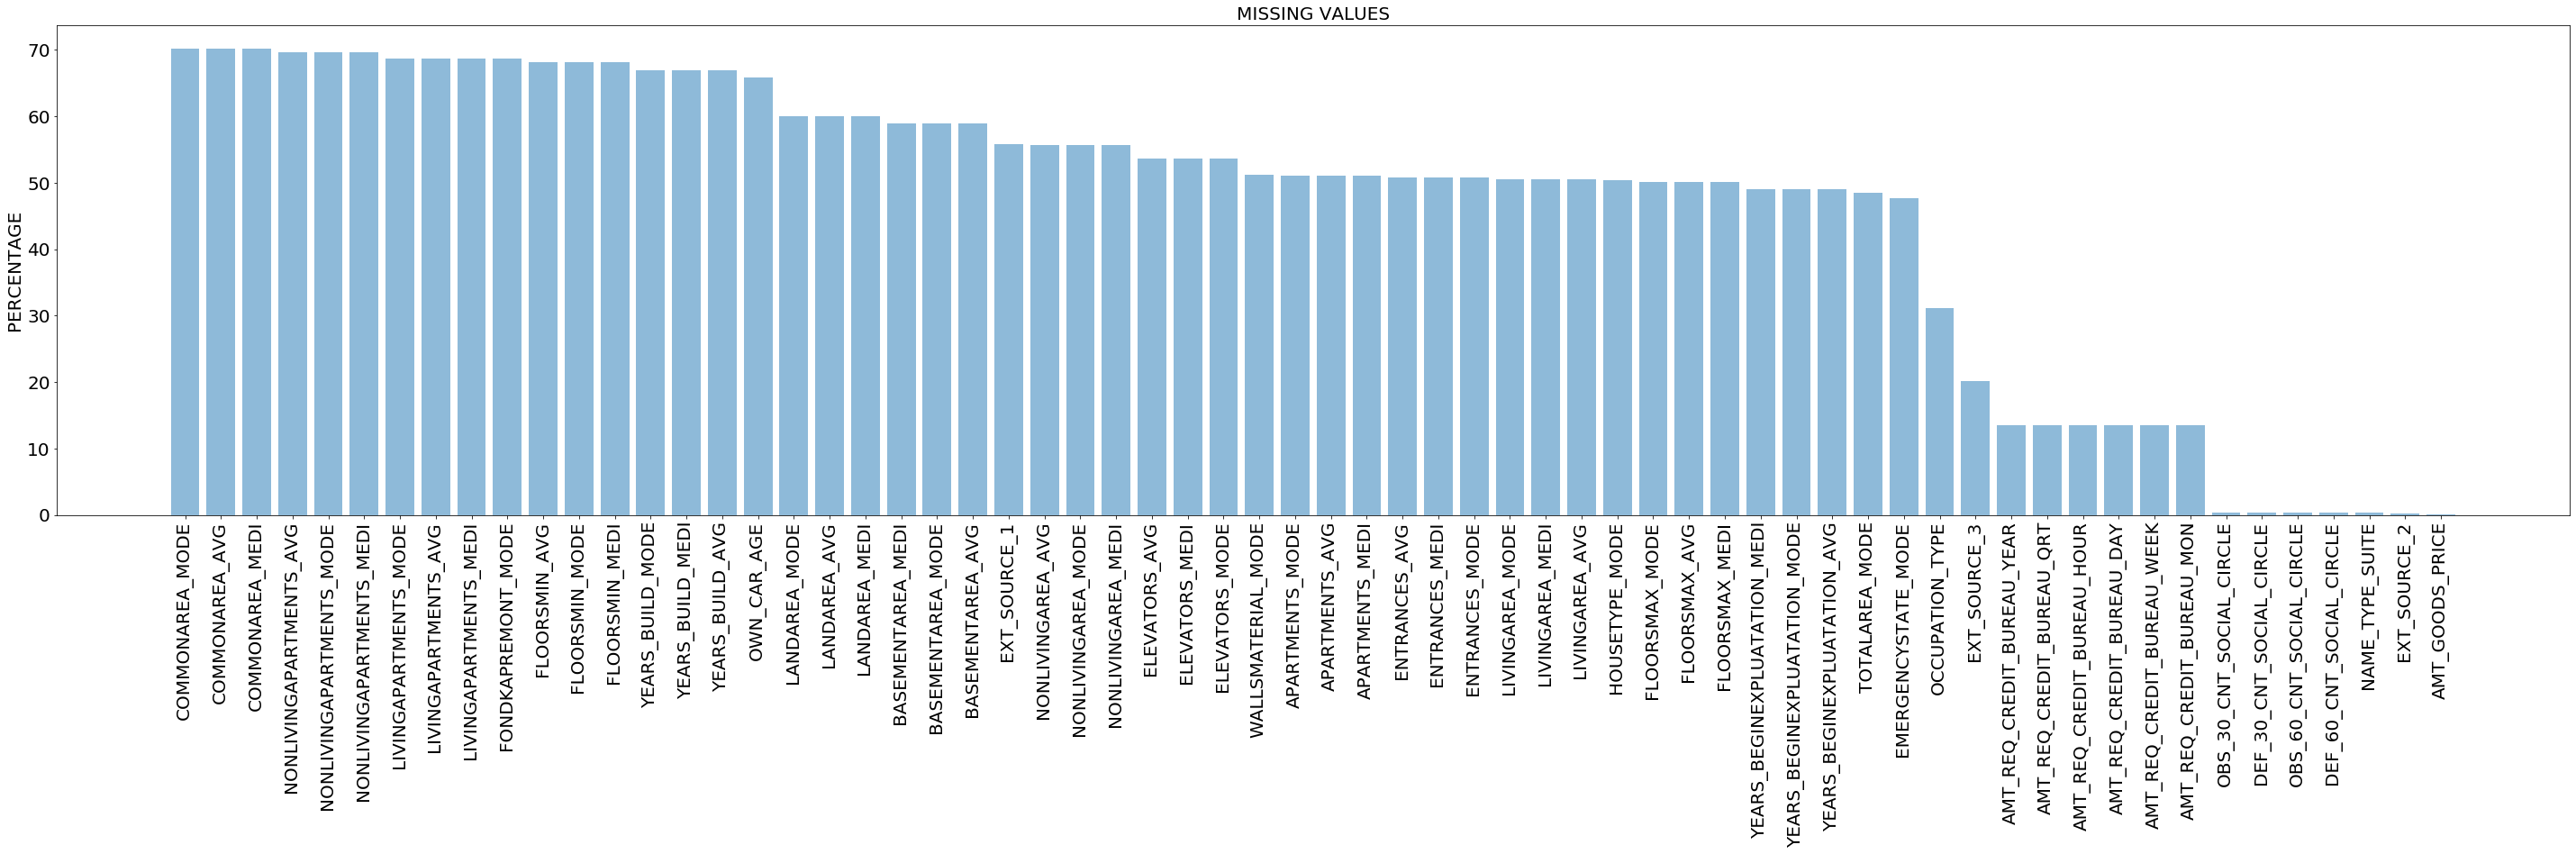

In [10]:
# Calculate Missing Value percentage and Visualize
missing_values_perc_df = f.missing_val_perc(missing_value_feats,x_df)
val = missing_values_perc_df[0].sort_values(ascending=False)
f.plot_bar(val.index,(50,10),val)

In [11]:
# Check direct imputations such as remove the records for attributes which contain less than 5% of null values or remove
# attributes which contain more than 65% of null values.
imp_df = f.impute_values(x_df,missing_value_feats,65,action=True)
imp_df.reset_index(drop=True)

Delete for feature AMT_GOODS_PRICE with 22 na rows with 0.07154238886540275 missing percentage values
Delete for feature NAME_TYPE_SUITE with 97 na rows with 0.31566272901819126 missing percentage values
Dropping feature OWN_CAR_AGE with 65.88534865500131 missing percentage values
For Feature EXT_SOURCE_1 Skew: -0.08362109599420867 ,Kurt: -0.961546506226127
Imputing EXT_SOURCE_1 with mean value as 0.5025743099918587
Delete for feature EXT_SOURCE_2 with 65 na rows with 0.21219639592582917 missing percentage values
Dropping feature YEARS_BUILD_AVG with 66.95128733601597 missing percentage values
Dropping feature COMMONAREA_AVG with 70.23260378839925 missing percentage values
Dropping feature FLOORSMIN_AVG with 68.18464356986293 missing percentage values
Dropping feature LIVINGAPARTMENTS_AVG with 68.75061340661497 missing percentage values
Dropping feature NONLIVINGAPARTMENTS_AVG with 69.68299146137991 missing percentage values
Dropping feature YEARS_BUILD_MODE with 66.95128733601597 miss

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,174545,1,Cash loans,F,N,Y,0,135000.000,654498.000,31617.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,3.000
1,209898,0,Cash loans,M,Y,Y,0,135000.000,234576.000,25393.500,...,0,0,0,0,0.000,0.000,1.000,0.000,0.000,0.000
2,454938,0,Cash loans,M,Y,Y,0,112500.000,157914.000,16753.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
3,398930,0,Cash loans,M,Y,N,0,247500.000,1125000.000,36292.500,...,0,0,0,0,0.000,0.000,0.000,9.000,0.000,1.000
4,201672,0,Cash loans,M,N,Y,0,202500.000,900000.000,35158.500,...,0,0,0,0,0.000,0.000,0.000,0.000,1.000,2.000
5,132243,0,Revolving loans,F,N,Y,0,121500.000,225000.000,11250.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,6.000
6,429350,1,Cash loans,F,N,N,0,90000.000,808650.000,26086.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
7,410203,0,Cash loans,F,N,N,2,54000.000,450000.000,21888.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
8,376596,0,Cash loans,F,N,N,1,180000.000,1125000.000,47664.000,...,0,0,0,0,0.000,0.000,0.000,1.000,0.000,0.000
9,446827,0,Cash loans,M,Y,N,0,121500.000,343377.000,13072.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,3.000


In [15]:
# How row in dataframe having more than x% NaN values
na_row_cnt = f.get_rowcnt_most_missing_val(imp_df,30)

2415 values in the dataset have more than  32 features as NA


In [16]:
# Identify na values exist and add them to a list
missing_value_feats = f.get_missing_value_feats(imp_df)
missing_value_feats

Index(['OCCUPATION_TYPE', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

##### OCCUPATION TYPE

In [ ]:
sns.kdeplot()